<img src='img/Topic_week4_text.png' width='900px'> 

# Diagrams Overview
We will teach you how to create visualizations for the following:
- **Word Cloud**
    - Simple Word Cloud
    - Circle Word Cloud
    - Silhouette Word Cloud
- **Venn Diagram//Document contrast diagrams**

### Before Starting

* `requests` : used to make HTTP requests to retrieve data
* `pandas` : used for dataset manipulation
* `matplotlib` : used to plot graphs
* `wordcloud` : used for creating word clouds
* `PIL` : used for creating graphics
* `random` : used for generating random numbers
* `io.BytesIO` : used for generating `bytes` objects for word cloud mask creation

In [3]:
#import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import random
from io import BytesIO

# Section 1: Word Cloud Data

<u>Speech Data</u>
* `trump_speech` [download here](https://raw.githubusercontent.com/PedramNavid/trump_speeches/master/data/speech_02.txt)
* The text data is sourced from President Trump's speech on foreign policy given at a National Press Club dinner in Washington D.C.
* We will be creating three different word clouds (simple, circle, silhouette) from this data

<u>Get speech *str* URL</u>
* Use `oprn` to read a text file
* Use `str()` to return `str` (string) from request data


In [44]:
trump_speech = open("data/speech_02.txt", "r")
trump_speech = str(trump_speech.read())
trump_speech

'Remarks on Foreign Policy at the National Press Club in Washington, DC\nThank you for the opportunity to speak to you, and thank you to the Center for the National Interest for honoring me with this invitation.  I would like to talk today about how to develop a new foreign policy direction for our country \x96 one that replaces randomness with purpose, ideology with strategy, and chaos with peace.  It is time to shake the rust off of America\'s foreign policy. It\'s time to invite new voices and new visions into the fold.  The direction I will outline today will also return us to a timeless principle. My foreign policy will always put the interests of the American people, and American security, above all else. That will be the foundation of every decision that I will make.  America First will be the major and overriding theme of my administration.  But to chart our path forward, we must first briefly look back.  We have a lot to be proud of. In the 1940s we saved the world. The Greate

## 1.1 Word Cloud (Simple)

* Create `WordCloud` object

In [22]:
# Generate a word cloud image
wc = WordCloud(background_color="white",
               width=800,
               height=800).generate(trump_speech)

<u>Display the generated image</u>
1. Set figure size `figsize=(16,9)`
2. Show word cloud in figure
3. Remove axes
4. Remove unnecessary spacing
5. Show plot

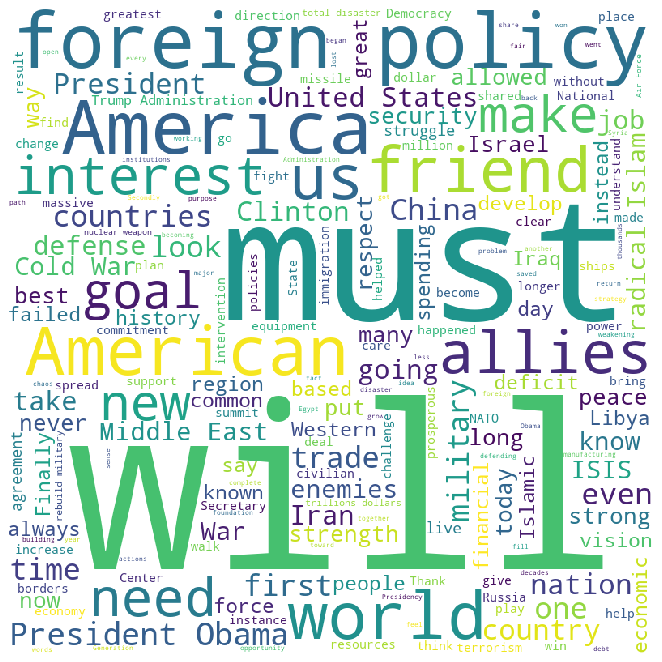

In [23]:
# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(16,9))
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## 1.2 Word Cloud (Circular form)

* Create circle mask `numpy` array


In [ ]:
x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

* Generate a word cloud image

In [ ]:
wc = WordCloud(background_color="white", mask=mask, width=300, height=300).generate(trump_speech)

<u>Display the generated image</u>
1. Set figure size `figsize=(16,9)`
2. Show word cloud in figure
3. Remove axes
4. Remove unnecessary spacing
5. Show plot

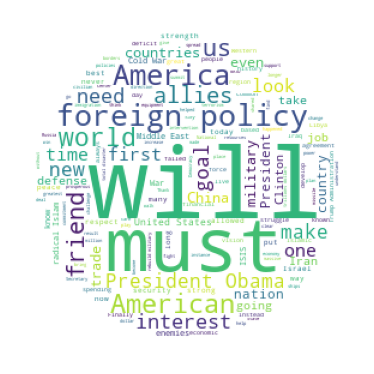

In [ ]:
plt.figure(figsize = (5,5))
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## 1.3 Word Cloud (Silhouette form)

Trump's silhouette. Download [here](https://img1.etsystatic.com/140/0/6522319/il_fullxfull.990448319_izew.jpg)

<u>Word Cloud Image</u>
* Black-and-white silhouette images will work best

In [41]:
from PIL import Image #use PIL for image processing.

im = Image.open("data/trump.jpg")
im_resize = im.resize((500, 500))
buf = io.BytesIO()
im_resize.save(buf, format='JPEG')
byte_im = buf.getvalue()

In [48]:
type(byte_im)

bytes

In [24]:
background_image = requests.get("https://img1.etsystatic.com/140/0/6522319/il_fullxfull.990448319_izew.jpg").content
type(background_image)

bytes

In the above code, we save the `im_resize` Image object into `BytesIO` object `buf`. Note that in this case, you have to specify the saving [image format](https://pillow.readthedocs.io/en/5.1.x/handbook/image-file-formats.html#image-file-formats) because PIL does not know the image format in this case. The bytes string can be retrieved using `getvalue()` method of `buf` variable.

* Get list of stop words to not include in word cloud

In [30]:
stop_words = list(STOPWORDS)

* Create mask `numpy` array from background image


In [49]:
trump_mask = np.array(Image.open(BytesIO(byte_im)))

* Create `WordCloud` object

In [52]:
wc = WordCloud(background_color = "white", 
               mask = trump_mask,
               random_state = 5,
               max_words = 2000,
               stopwords = stop_words)

* Generate word cloud (with image mask) from `trump_speech` string

In [53]:
wc.generate(trump_speech)

* `create_color_func()` : Creates color scheme function
* Adjust first parameter hue hsl value to change color 
 * Experiment with changing hue value (20) in `hsl(20, 99%%, %d%%)`

In [54]:
def create_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(10, 99%%, %d%%)" % random.randint(40, 70)

<u>Display the generated image</u>
1. Set figure size to large `figsize=(20,20)`
2. Remove unnecessary spacing
3. Remove plot axis
4. Apply color function
5. Show word cloud

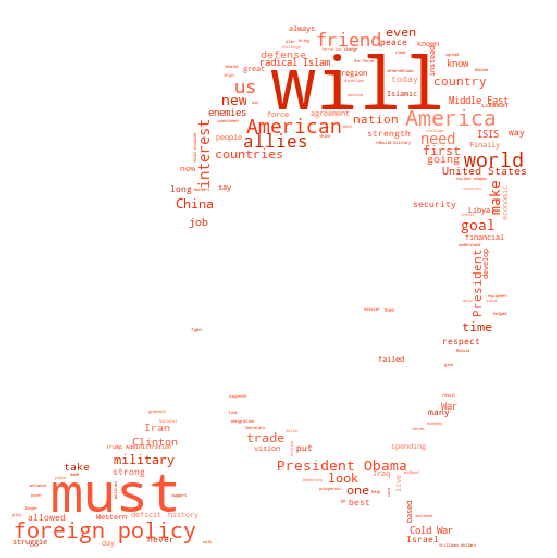

In [56]:
plt.figure(figsize=(10,10))
plt.tight_layout(pad=0)
plt.axis("off")
plt.imshow(wc.recolor(color_func = create_color_func,
                      random_state =5 ))
plt.show()

### Practice:
---
Now is your turn! Create a word cloud silhouette of a celebrity/politican with his/her speech.

In [ ]:
# Your code here








# Section2: Venn Diagram/Document contrast diagrams

#### What is Venn diagram?

- Sets of shapes especially circles to represent the logical relationships among two or more variables or datasets
- Venn diagrams are useful to identify the shared and unique elements belonging to each variable or datasets For example, in genomics experiments Venn diagrams are useful to identify the shared and unique genes among different conditions


Now, we will recreate a venn diagram showing the very different debates Republicans and Democrats are having.

<br>

<img src='img/week4_venn.png' width='400px'> 


**References**
[https://github.com/konstantint/matplotlib-venn](https://github.com/konstantint/matplotlib-venn)


In [76]:
# install atplotlib_venn https://pypi.org/project/matplotlib-venn/
#! pip install matplotlib_venn

from matplotlib_venn import venn2

* `matplotlib_venn` : venn diagram library for matplotlib
* `venn2` : two-circle venn diagram function

* `democratic_data` : list of topics discussed by democrats primarily
* `common_data` : list of topics discussed by democrats and republicans
* `republican_data` : list of topics discussed by republicans primarily

In [62]:
democratic_data = ['Racism', 'College debt', 'Financial reform', 'Paid family leave', 'Wealth inequality', 'Early childhood ed', 'Renewable energy', 'Campaign finance', 'Veterans care', 'Infrastructure', 'Equal pay']
common_data = ['Guns', 'Health care', 'Surveillance', 'Gay marriage', 'Foreign policy', 'Incarceration', 'Black Lives Matter', 'Minimum wage', 'Climate chance', 'Social Security', 'Immigration', 'Marijuana', 'Taxes']
republican_data = ['Deficit', 'Abortion', 'Vaccines', 'Religious freedom', 'Military readiness', 'Supreme Court justices', 'Birthright citizenship', 'Islamic terrorism', 'Border control', 'Unions', 'IRS']

* `list_to_string(lst)` takes a list `lst` and creates a string seperated by line-breaks to be used in venn diagram

In [63]:
def list_to_string(lst):
  out = ""
  for item in lst:
    out += item + "\n\n"
  return out

Text(0.5, 1.0, 'The topics Democrats and Republicans have debated')

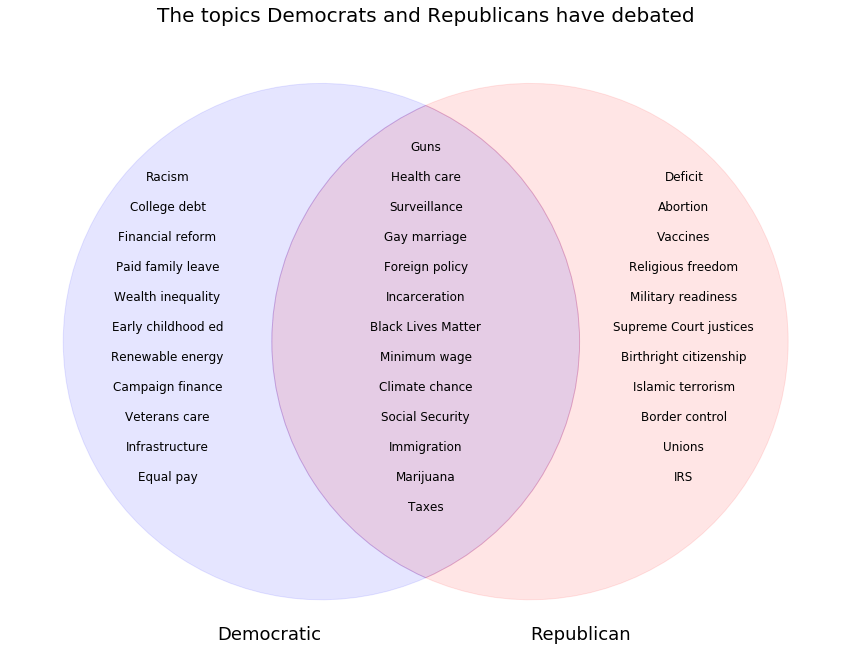

In [73]:
# Set figure size to (10,10) - large
plt.figure(figsize=(15,15))

# Defining two-circle venn diagram object with venn2
# Define set labels
v = venn2(subsets=(1,1,1), set_labels = ('Democratic', 'Republican'))

# Setting colors of circles
# Democratic - blue
# Common - purple
# Republican - red
v.get_patch_by_id('10').set_color('blue')
v.get_patch_by_id('11').set_color('purple')
v.get_patch_by_id('01').set_color('red')


# Transparency
v.get_patch_by_id('10').set_alpha(0.1)
v.get_patch_by_id('11').set_alpha(0.2)
v.get_patch_by_id('01').set_alpha(0.1)

# Set text of venn diagram sections
v.get_label_by_id('10').set_text(list_to_string(democratic_data))
v.get_label_by_id('11').set_text(list_to_string(common_data))
v.get_label_by_id('01').set_text(list_to_string(republican_data))

# Change font size of circle titles
for text in v.set_labels:
    text.set_fontsize(18)

# Change font size of venn diagram sections
for text in v.subset_labels:
    text.set_fontsize(12)

# Plot Venn Diagram
plt.axis("off")
# Create title with fontsize=20
plt.title('The topics Democrats and Republicans have debated', fontsize=20)

### Practice:
---
Now is your turn! Take the below venn diagram as a reference and recreate it.


<img src='img/week4_venn_2.png' width='500px'> 


In [ ]:
# Your code here
















## Conclusion

Here you see how we can use the `wordcloud` and `matplotlib_venn` libraries to create word clouds and venn diagrams using Python. Go ahead and try experimenting with the code above to create your own!